# 하이퍼볼릭 탄젠트 (Hyperbolic Tangent, Tanh)

### 개념 요약
**하이퍼볼릭 탄젠트(Tanh)**는 신경망에서 사용되는 활성화 함수(Activation Function) 중 하나임. 입력값을 **-1과 1 사이의 범위**로 압축하는 S자 형태의 곡선(Sigmoid-like)을 가짐.

Tanh 함수는 출력값의 중심이 0이므로 (zero-centered), 시그모이드(Sigmoid) 함수에 비해 학습 과정에서 편향(bias)을 줄여 최적화가 더 효율적으로 이루어질 수 있도록 돕는 장점이 있음. 과거 순환 신경망(RNN) 등에서 널리 사용되었음.

### 수학적 배경 📐
Tanh 함수는 수학적으로 다음과 같이 정의됨.

$$ \tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}} $$

이 식은 시그모이드 함수($\sigma(x)$)를 변형하여 표현할 수도 있음.

$$ \tanh(x) = 2\sigma(2x) - 1 $$

Tanh 함수의 미분은 자기 자신을 이용하여 간단하게 표현되며, 이는 역전파 과정에서 사용됨.

$$ \frac{d}{dx}\tanh(x) = 1 - \tanh^2(x) $$

### 라이브러리 임포트 (Setup)

In [1]:
# !pip install numpy matplotlib
import numpy as np
import matplotlib.pyplot as plt

### 예제 데이터 준비 (Data Preparation)
Tanh 함수의 형태를 시각화하기 위해 -10부터 10까지의 범위를 갖는 입력 데이터를 생성함.

In [2]:
x = np.linspace(-10, 10, 100)
print(f"입력 데이터 x의 형태: {x.shape}")
print(f"입력 데이터 x의 일부: {x[:5]}...")

입력 데이터 x의 형태: (100,)
입력 데이터 x의 일부: [-10.          -9.7979798   -9.5959596   -9.39393939  -9.19191919]...


### 핵심 로직 구현 (Code Implementation)
NumPy를 사용하여 Tanh 함수를 직접 구현함. 수학적 정의를 코드로 변환하는 과정임.

In [3]:
def tanh(x):
    """NumPy를 이용해 Tanh 함수를 계산"""
    return np.tanh(x) # NumPy에 내장된 Tanh 함수를 사용하거나 직접 구현 가능
    # 직접 구현: (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))

def tanh_derivative(x):
    """Tanh 함수의 미분을 계산"""
    return 1 - tanh(x)**2

# 특정 입력값에 대한 Tanh 출력 확인
test_inputs = np.array([-100, -2, 0, 2, 100])
tanh_outputs = tanh(test_inputs)

print("| 입력(x) | Tanh 출력 |\n|---|---|")
for i, o in zip(test_inputs, tanh_outputs):
    print(f"| {i:<7} | {o:<9.4f} |")

| 입력(x) | Tanh 출력 |
|---|---|
| -100    | -1.0000   |
| -2      | -0.9640   |
| 0       | 0.0000    |
| 2       | 0.9640    |
| 100     | 1.0000    |


결과에서 볼 수 있듯이, 매우 작은 입력값(-100)은 -1에, 매우 큰 입력값(100)은 1에 수렴하며, 입력값이 0일 때 Tanh의 출력값도 0이 됨.

### 결과 확인 및 시각화 (Results & Visualization) 📊
구현한 Tanh 함수와 그 미분 함수의 그래프를 그려 동작 방식을 시각적으로 확인함.

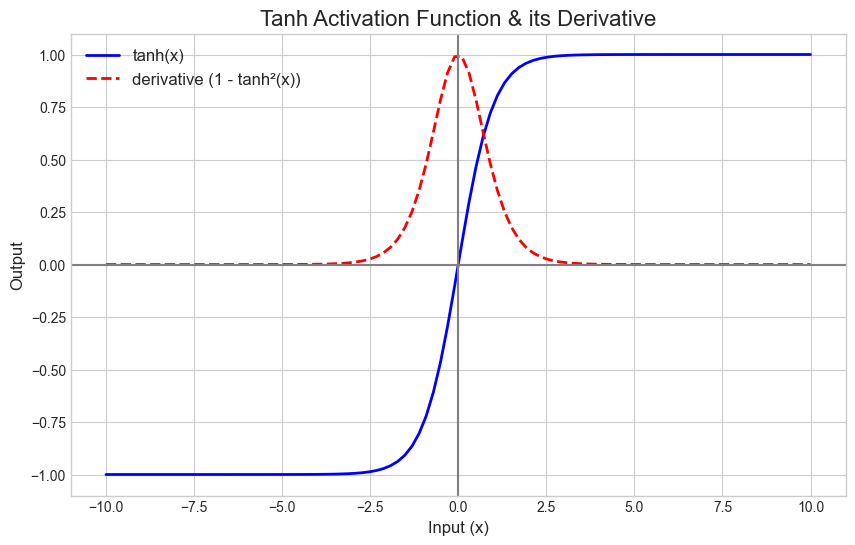

In [4]:
# Tanh 함수와 미분 함수 계산
y_tanh = tanh(x)
y_derivative = tanh_derivative(x)

# 시각화
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(10, 6))

plt.plot(x, y_tanh, label='tanh(x)', color='blue', linewidth=2)
plt.plot(x, y_derivative, label='derivative (1 - tanh²(x))', color='red', linestyle='--', linewidth=2)

plt.title('Tanh Activation Function & its Derivative', fontsize=16)
plt.xlabel('Input (x)', fontsize=12)
plt.ylabel('Output', fontsize=12)
plt.legend(fontsize=12)
plt.axhline(y=0, color='gray', linestyle='-')
plt.axvline(x=0, color='gray', linestyle='-')

plt.show()

그래프에서 Tanh 함수는 입력값을 (-1, 1) 사이로 매끄럽게 변환하는 것을 볼 수 있음. 미분 그래프(붉은 점선)는 입력값의 절댓값이 커질수록 0에 가까워지는 것을 보여주며, 이는 '기울기 소실' 문제와 관련이 있음.

### 고려사항 (Considerations)
* <b>기울기 소실 문제 (Vanishing Gradient Problem):</b> Tanh 함수는 입력값 $x$의 절댓값이 커지면 기울기(미분값)가 0에 매우 가까워짐. 신경망의 층이 깊어질 경우, 역전파 과정에서 기울기가 점차 사라져 가중치 업데이트가 거의 이루어지지 않는 문제가 발생할 수 있음.

* **ReLU와의 비교:** 최근에는 Tanh 함수보다 **ReLU(Rectified Linear Unit)** 함수와 그 변형들이 더 널리 사용됨. ReLU는 양수 입력에 대해 기울기가 1로 일정하여 기울기 소실 문제가 적고, 계산 비용이 훨씬 저렴하기 때문임. 하지만 Tanh는 출력이 0을 중심으로 분포하기 때문에 특정 상황에서는 여전히 유용함.

### 최종 요약 (Conclusion)
Tanh는 입력 신호를 -1과 1 사이로 압축하는 비선형 활성화 함수임. 출력의 중심이 0이라는 장점 덕분에 시그모이드 함수보다 선호되었으나, 입력값이 커지면 기울기가 0으로 수렴하는 기울기 소실 문제가 존재함.

이러한 특성 때문에 최근에는 많은 심층 신경망에서 ReLU 계열의 함수에 자리를 내주었지만, 출력의 범위를 제한하거나 0 중심의 출력이 중요한 순환 신경망(RNN)의 LSTM, GRU와 같은 특정 구조에서는 여전히 중요한 역할을 수행함.